NAME : DHRUVI SHAH


MS in DATA SCIENCE : COLUMBIA UNIVERSITY

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/DS1.6_training_data.csv")

# 1 . Data Manipultion

Labeling “hot_water_flow” column


In [ ]:
train_data = pd.DataFrame(data)
train_data.shape       #understand the shape of the data

(2067, 7)

In [ ]:
train_data.isna().sum()      # checking for missing data if any

device_time                    0
geyser_internal_temperature    0
inlet_temperature              0
outlet_temperature             0
ambient_temperature            0
energy_usage                   0
hot_water_flow                 0
dtype: int64

In [ ]:
def categorize_hot_water_flow(flow_value):    #defining the funtion for classifying the label
  if flow_value == 0:
    return 0
  elif flow_value > 0:
    return 1


In [ ]:
train_data['hot_water_flow_label'] = train_data['hot_water_flow'].apply(categorize_hot_water_flow)  #classification

In [ ]:
# Another way to do it !
#condition = [
#     train_data['hot_water_flow'] == 0 ,
#     train_data['hot_water_flow'] > 0
# ]
# category = [0,1]

# train_data['np_hot_water_flow_label'] = np.select(condition, category, default='Unkonwn')
# train_data= train_data.drop(columns= 'np_hot_water_flow_label')

# 2 . Exploratory Data Analysis

## 2.1 Label Distribution

Checking the distribution of the label (target variable)

In [ ]:

train_data['hot_water_flow_label'].value_counts()

0    1895
1     172
Name: hot_water_flow_label, dtype: int64

<Axes: xlabel='hot_water_flow_label', ylabel='count'>

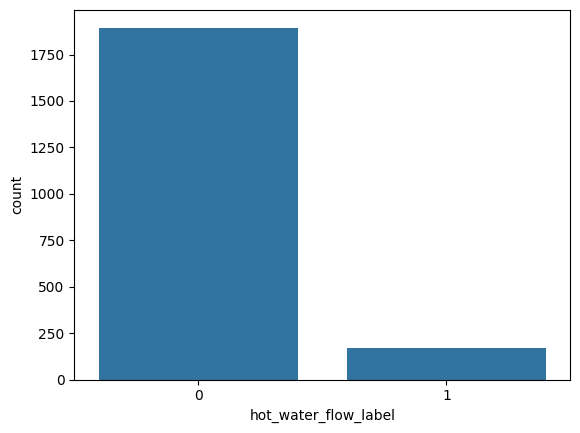

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='hot_water_flow_label', data=train_data)

Highly Imbalanced Label

## 2.2 Histograms

I want to see the distritbution of the other sensor measurement with respect to Labels

In [ ]:
train_data.columns

Index(['device_time', 'geyser_internal_temperature', 'inlet_temperature',
       'outlet_temperature', 'ambient_temperature', 'energy_usage',
       'hot_water_flow', 'hot_water_flow_label'],
      dtype='object')

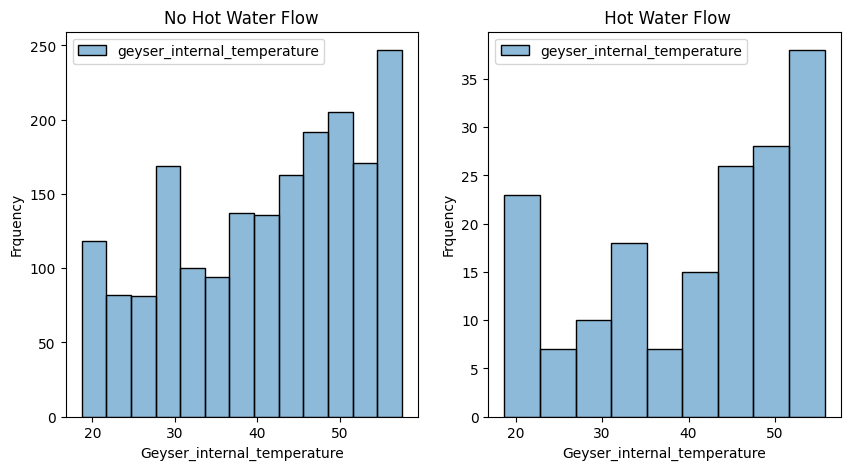

In [ ]:
git_0 = train_data.loc[(train_data['hot_water_flow_label']==0), ['geyser_internal_temperature']]
git_1 = train_data.loc[(train_data['hot_water_flow_label']==1),['geyser_internal_temperature']]


fig , axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(git_0 , ax=axes[0])
axes[0].set_title('No Hot Water Flow')
axes[0].set_xlabel('Geyser_internal_temperature')
axes[0].set_ylabel('Frquency')



sns.histplot(git_1, ax=axes[1])
axes[1].set_title(' Hot Water Flow')
axes[1].set_xlabel('Geyser_internal_temperature')
axes[1].set_ylabel('Frquency')

plt.show()




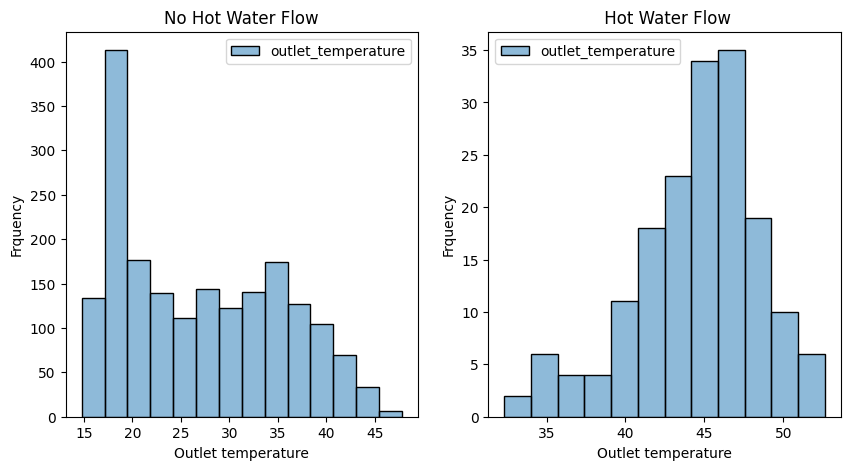

In [ ]:
out_0 = train_data.loc[(train_data['hot_water_flow_label']==0), ['outlet_temperature']]
out_1 = train_data.loc[(train_data['hot_water_flow_label']==1),['outlet_temperature']]

fig , axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(out_0 , ax=axes[0])
axes[0].set_title('No Hot Water Flow')
axes[0].set_xlabel('Outlet temperature')
axes[0].set_ylabel('Frquency')

sns.histplot(out_1, ax=axes[1])
axes[1].set_title(' Hot Water Flow')
axes[1].set_xlabel('Outlet temperature')
axes[1].set_ylabel('Frquency')

plt.show()

This plot doesnt seems to be much usefull, as they have varying frequency range lets have a look at the overlapping histogram charts  !!

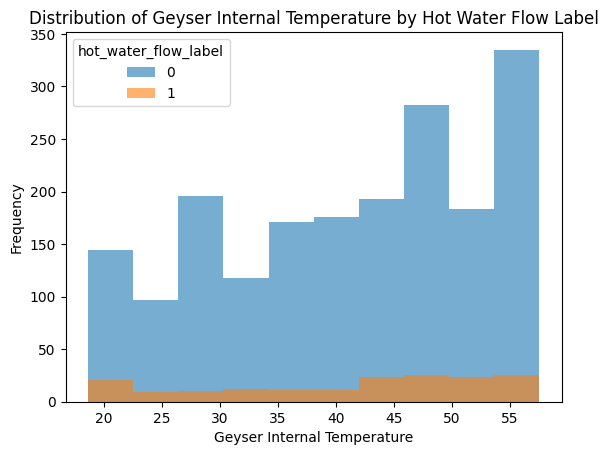

In [ ]:
ax = train_data.pivot(columns = 'hot_water_flow_label',values = 'geyser_internal_temperature').plot.hist(alpha = 0.6)

#Adding labels and title
ax.set_xlabel('Geyser Internal Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Geyser Internal Temperature by Hot Water Flow Label')
plt.show()

Distrubtion looks similar. I dont think we can use this feature will much significance.

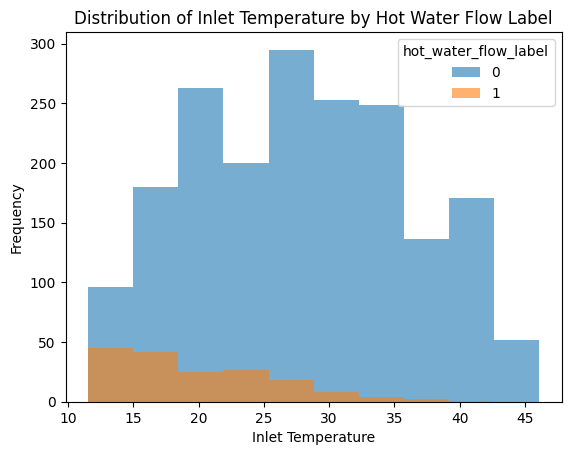

In [ ]:
ax = train_data.pivot(columns = 'hot_water_flow_label',values = 'inlet_temperature').plot.hist(alpha = 0.6)


#Adding labels and title
ax.set_xlabel('Inlet Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Inlet Temperature by Hot Water Flow Label')
plt.show()

Intresting ! When there is hot water flow values is closer to 10°C

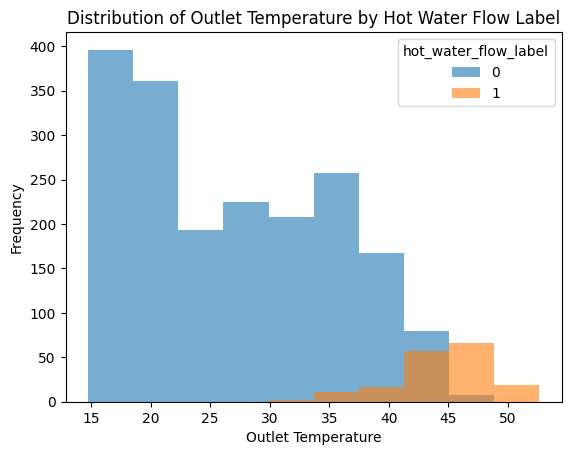

In [ ]:
ax = train_data.pivot(columns = 'hot_water_flow_label', values = 'outlet_temperature').plot.hist(alpha = 0.6)


#Adding labels and title
ax.set_xlabel('Outlet Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Outlet Temperature by Hot Water Flow Label')
plt.show()

Jackpot !! When there is a flow of hot water, the temperature typically ranges between 35°C to 55°C, it also indicates that as the temperature of the water rises, signaling the presence of hot water flow.

Hence, if you see 'outlet_temperature' > 45, you are almost sure that 'hot_water_flow' is 1

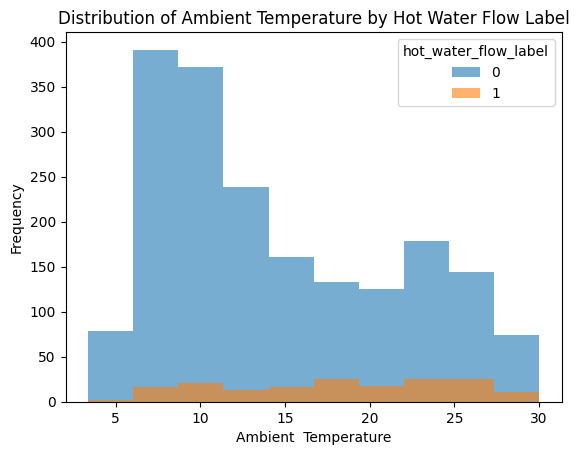

In [ ]:
ax = train_data.pivot(columns = 'hot_water_flow_label', values = 'ambient_temperature').plot.hist(alpha = 0.6)


#Adding labels and title
ax.set_xlabel('Ambient  Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Ambient Temperature by Hot Water Flow Label')
plt.show()

Intresting !! When the hot water flow is 1 temperature is higher than usual, but the difference is perhaps too small to be significant.

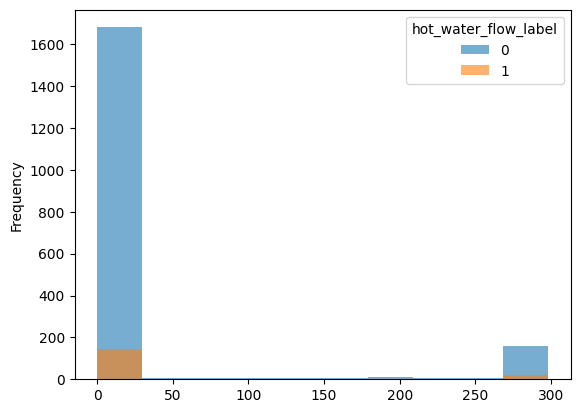

In [ ]:
train_data.pivot(columns = 'hot_water_flow_label', values = 'energy_usage').plot.hist(alpha = 0.6)

#Adding labels and title
ax.set_xlabel('Energy Usage')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Energy Usage by Hot Water Flow Label')
plt.show()

Distribution looks similar for hot water label '0' and '1' Cannot use this feature.

## 2.3 Let's explore correlation now

<ipython-input-18-dc3a8a176a50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

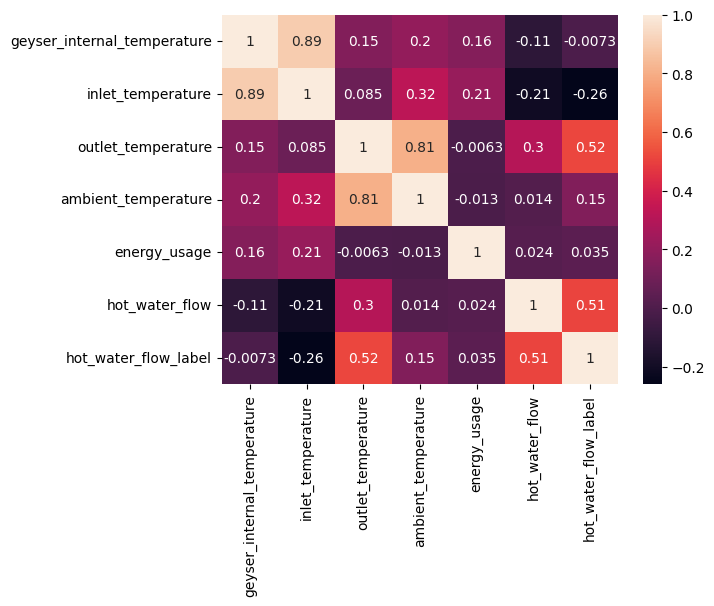

In [ ]:
sns.heatmap(train_data.corr(), annot=True)

There is a significant correlation between
- Inlet_temperature  - geyser internal
- Outlet temp - ambient temperature

The insight here is, out of the correlated features it makes sense to use either one of the feature, say from Inlet_temperature and Geyser_temperature we will only use the one to avoid multicoliniearity. likewise for the second case.


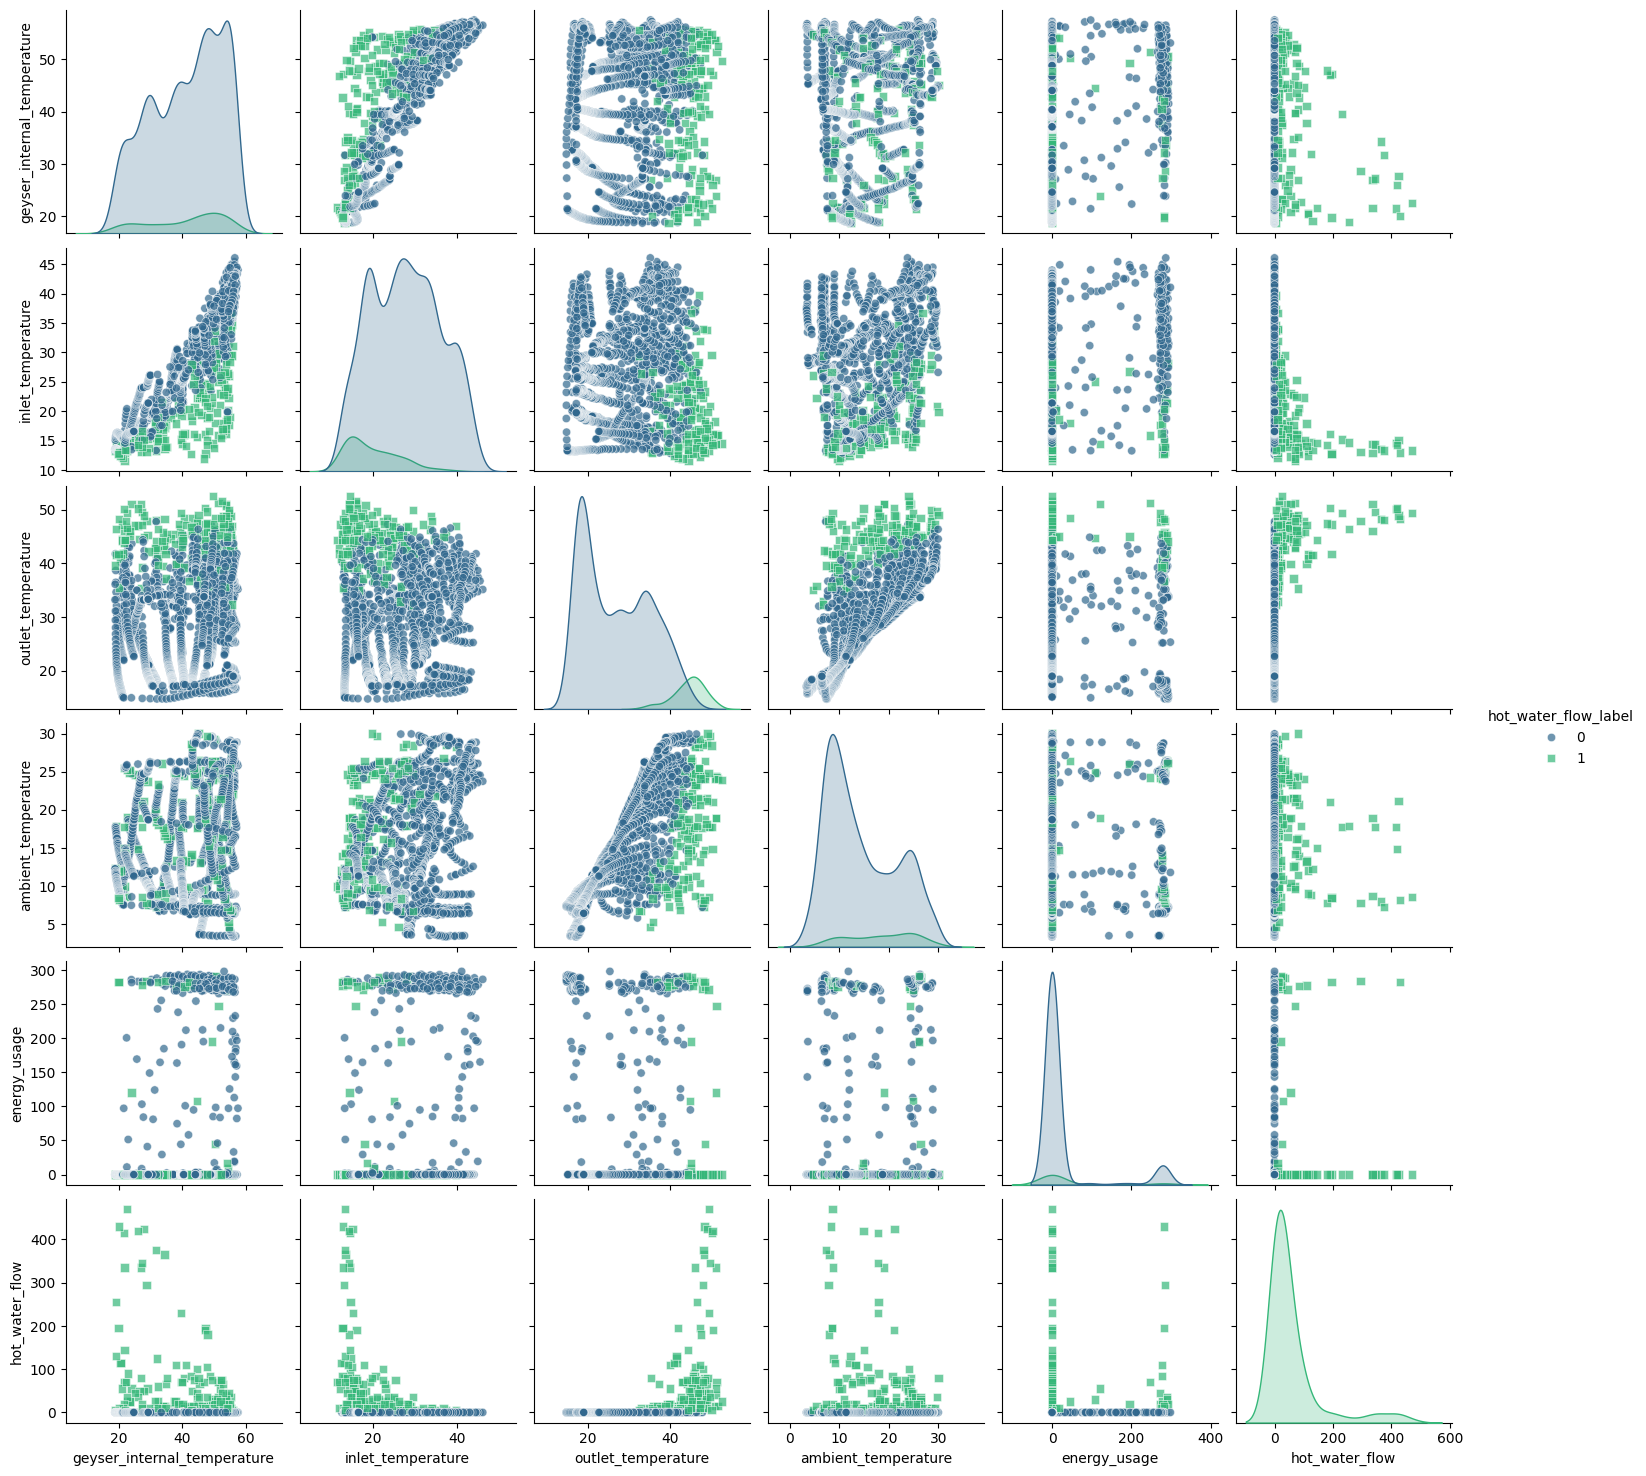

In [ ]:
sns.pairplot(train_data, hue='hot_water_flow_label', diag_kind='kde', markers=['o', 's'],
             plot_kws={'alpha': 0.7}, palette='viridis')
plt.show()

Some Intresting facts from the scatterplot :

1. Geyser Internal temperature is correlated with inlet Temperture , more data points with label hot_water_flow_label =1 are close toward 10
2. Ambient Temperature seems correlated with Outlet_temperature and more data points with label hot_water_flow_label =1 are close toward 40




<Axes: xlabel='inlet_temperature', ylabel='outlet_temperature'>

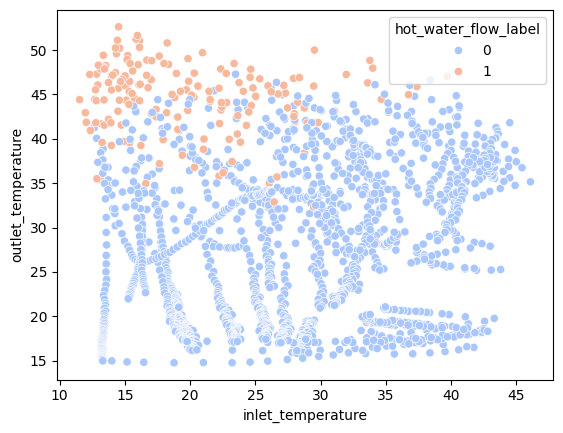

In [ ]:
sns.scatterplot(data=train_data,  x='inlet_temperature', y='outlet_temperature', hue='hot_water_flow_label', palette='coolwarm')

-This is really intreasting insight, for hot water label '1', the more of the data points for inlet_tempreture lies between 10 - 30 .

-Where as for Outlet temperature  for hot water label '1', the more of the data points for inlet_tempreture lies between 40 - 55 .


For now , we can use Outlet_temp(as it clearly distinguishes the lables ) and may be inlet_temp but instead lets dervie some variables and explore the possibility of adding some additional features.

##2.4 Feature Engineering

Lets derive few additional features

As the inlet_tempreture feature and outlet_temperature feature seems significant, I want to test whether there difference has any impact on the hot water label ?

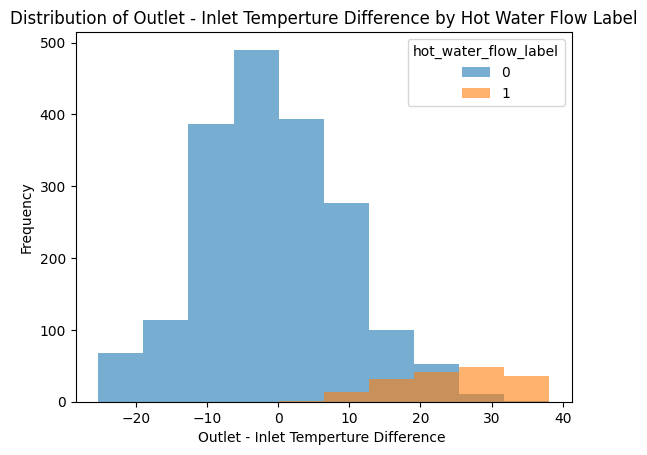

In [ ]:
train_data['inlet_outlet_diff'] = train_data['outlet_temperature'] - train_data['inlet_temperature']
ax = train_data.pivot(columns = 'hot_water_flow_label', values = 'inlet_outlet_diff').plot.hist(alpha = 0.6)

#Adding labels and title
ax.set_xlabel('Outlet - Inlet Temperture Difference ')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Outlet - Inlet Temperture Difference by Hot Water Flow Label')
plt.show()


I derived a feature using the outlet and inlet information, seems like its useful.

Intresting, when the hot water flow is '1',  the difference in temperature incraeses, but performs similar to outlet_temperature feature.



let's derive another feature using ambiant and gyser Temperature

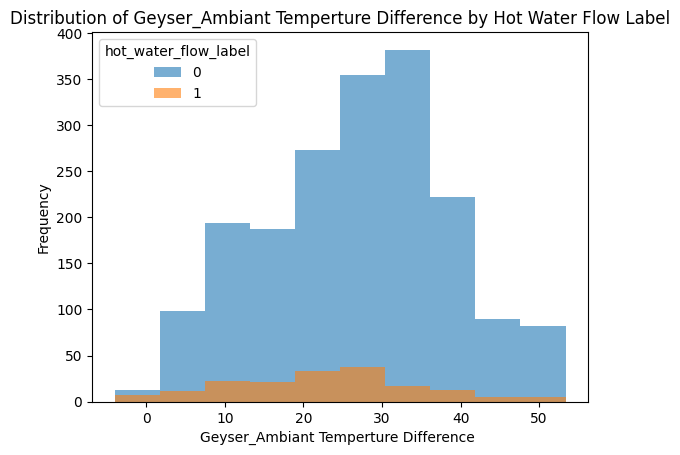

In [ ]:
train_data['geyser_ambiant_diff'] = train_data['geyser_internal_temperature'] - train_data['ambient_temperature']
ax = train_data.pivot(columns = 'hot_water_flow_label', values = 'geyser_ambiant_diff').plot.hist(alpha = 0.6)

#Adding labels and title
ax.set_xlabel('Geyser_Ambiant Temperture Difference ')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Geyser_Ambiant Temperture Difference by Hot Water Flow Label')
plt.show()


Aww :(
! Looking at the distribution doesnt seems to be much of the use and as for both the labels data are more concerntrated between 15 - 35

let's derive another feature using inlet and ambiant

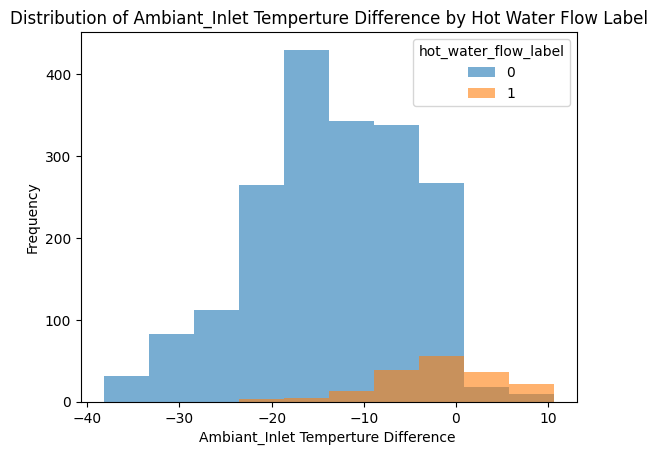

In [ ]:
train_data['ambiant_inlet_diff'] = train_data['ambient_temperature'] - train_data['inlet_temperature']
ax = train_data.pivot(columns = 'hot_water_flow_label', values = 'ambiant_inlet_diff').plot.hist(alpha = 0.6)

#Adding labels and title
ax.set_xlabel('Ambiant_Inlet Temperture Difference ')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Ambiant_Inlet Temperture Difference by Hot Water Flow Label')

plt.show()


This seems useful, but lets analyze further by creating sctter plots and checking the correlation


let's derive the last one gyser and outlet

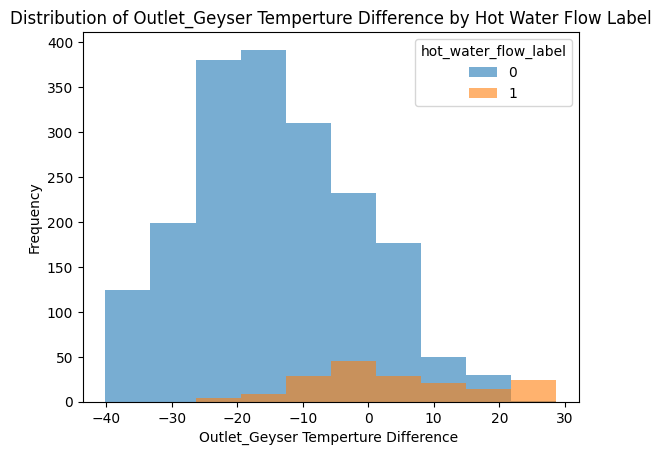

In [ ]:
train_data['outlet_geyser_diff'] =train_data['outlet_temperature']- train_data['geyser_internal_temperature']
ax = train_data.pivot(columns = 'hot_water_flow_label', values = 'outlet_geyser_diff').plot.hist(alpha = 0.6)

#Adding labels and title
ax.set_xlabel('Outlet_Geyser Temperture Difference ')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Outlet_Geyser Temperture Difference by Hot Water Flow Label')

plt.show()

Might be useful !!

let's check the correlation between derived variables

<ipython-input-25-dc3a8a176a50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

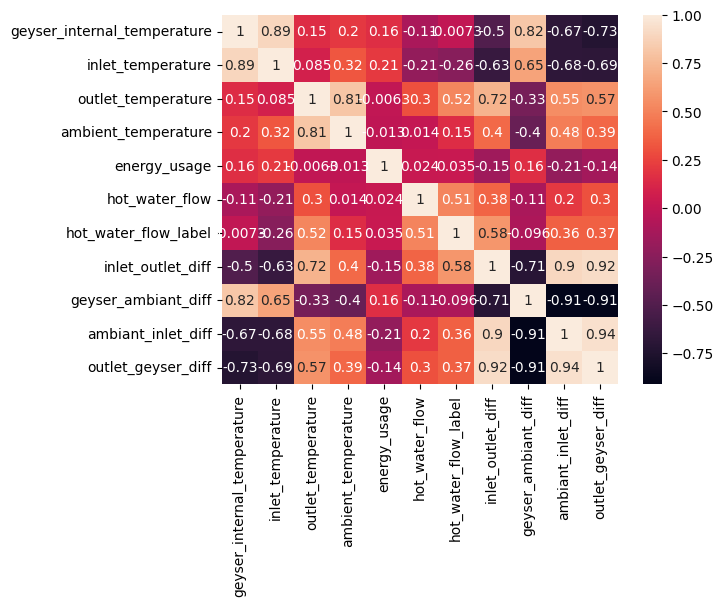

In [ ]:
sns.heatmap(train_data.corr(), annot=True)

As from the 2.1 I have decided to use Outlet and wanted to check the feasibility of using any other derived variable instead of inlet temp , from the above matrix to avoid multicolinearity.

Outlet - Inlet Difference : Highly correlated with Outlet Temperature, so we will drop it.


Gyser - Ambient Difference : from the Histogram , not clerly distingusable  Lets explore the scatter plot.


Inlet- Ambient Temperature :  let explore scatter plot with respect to Outlet Temperature and hot water labels.

Gyser - Outlet Temperature : let explore scatter plot with respect to Outlet Temperature and hot water labels.



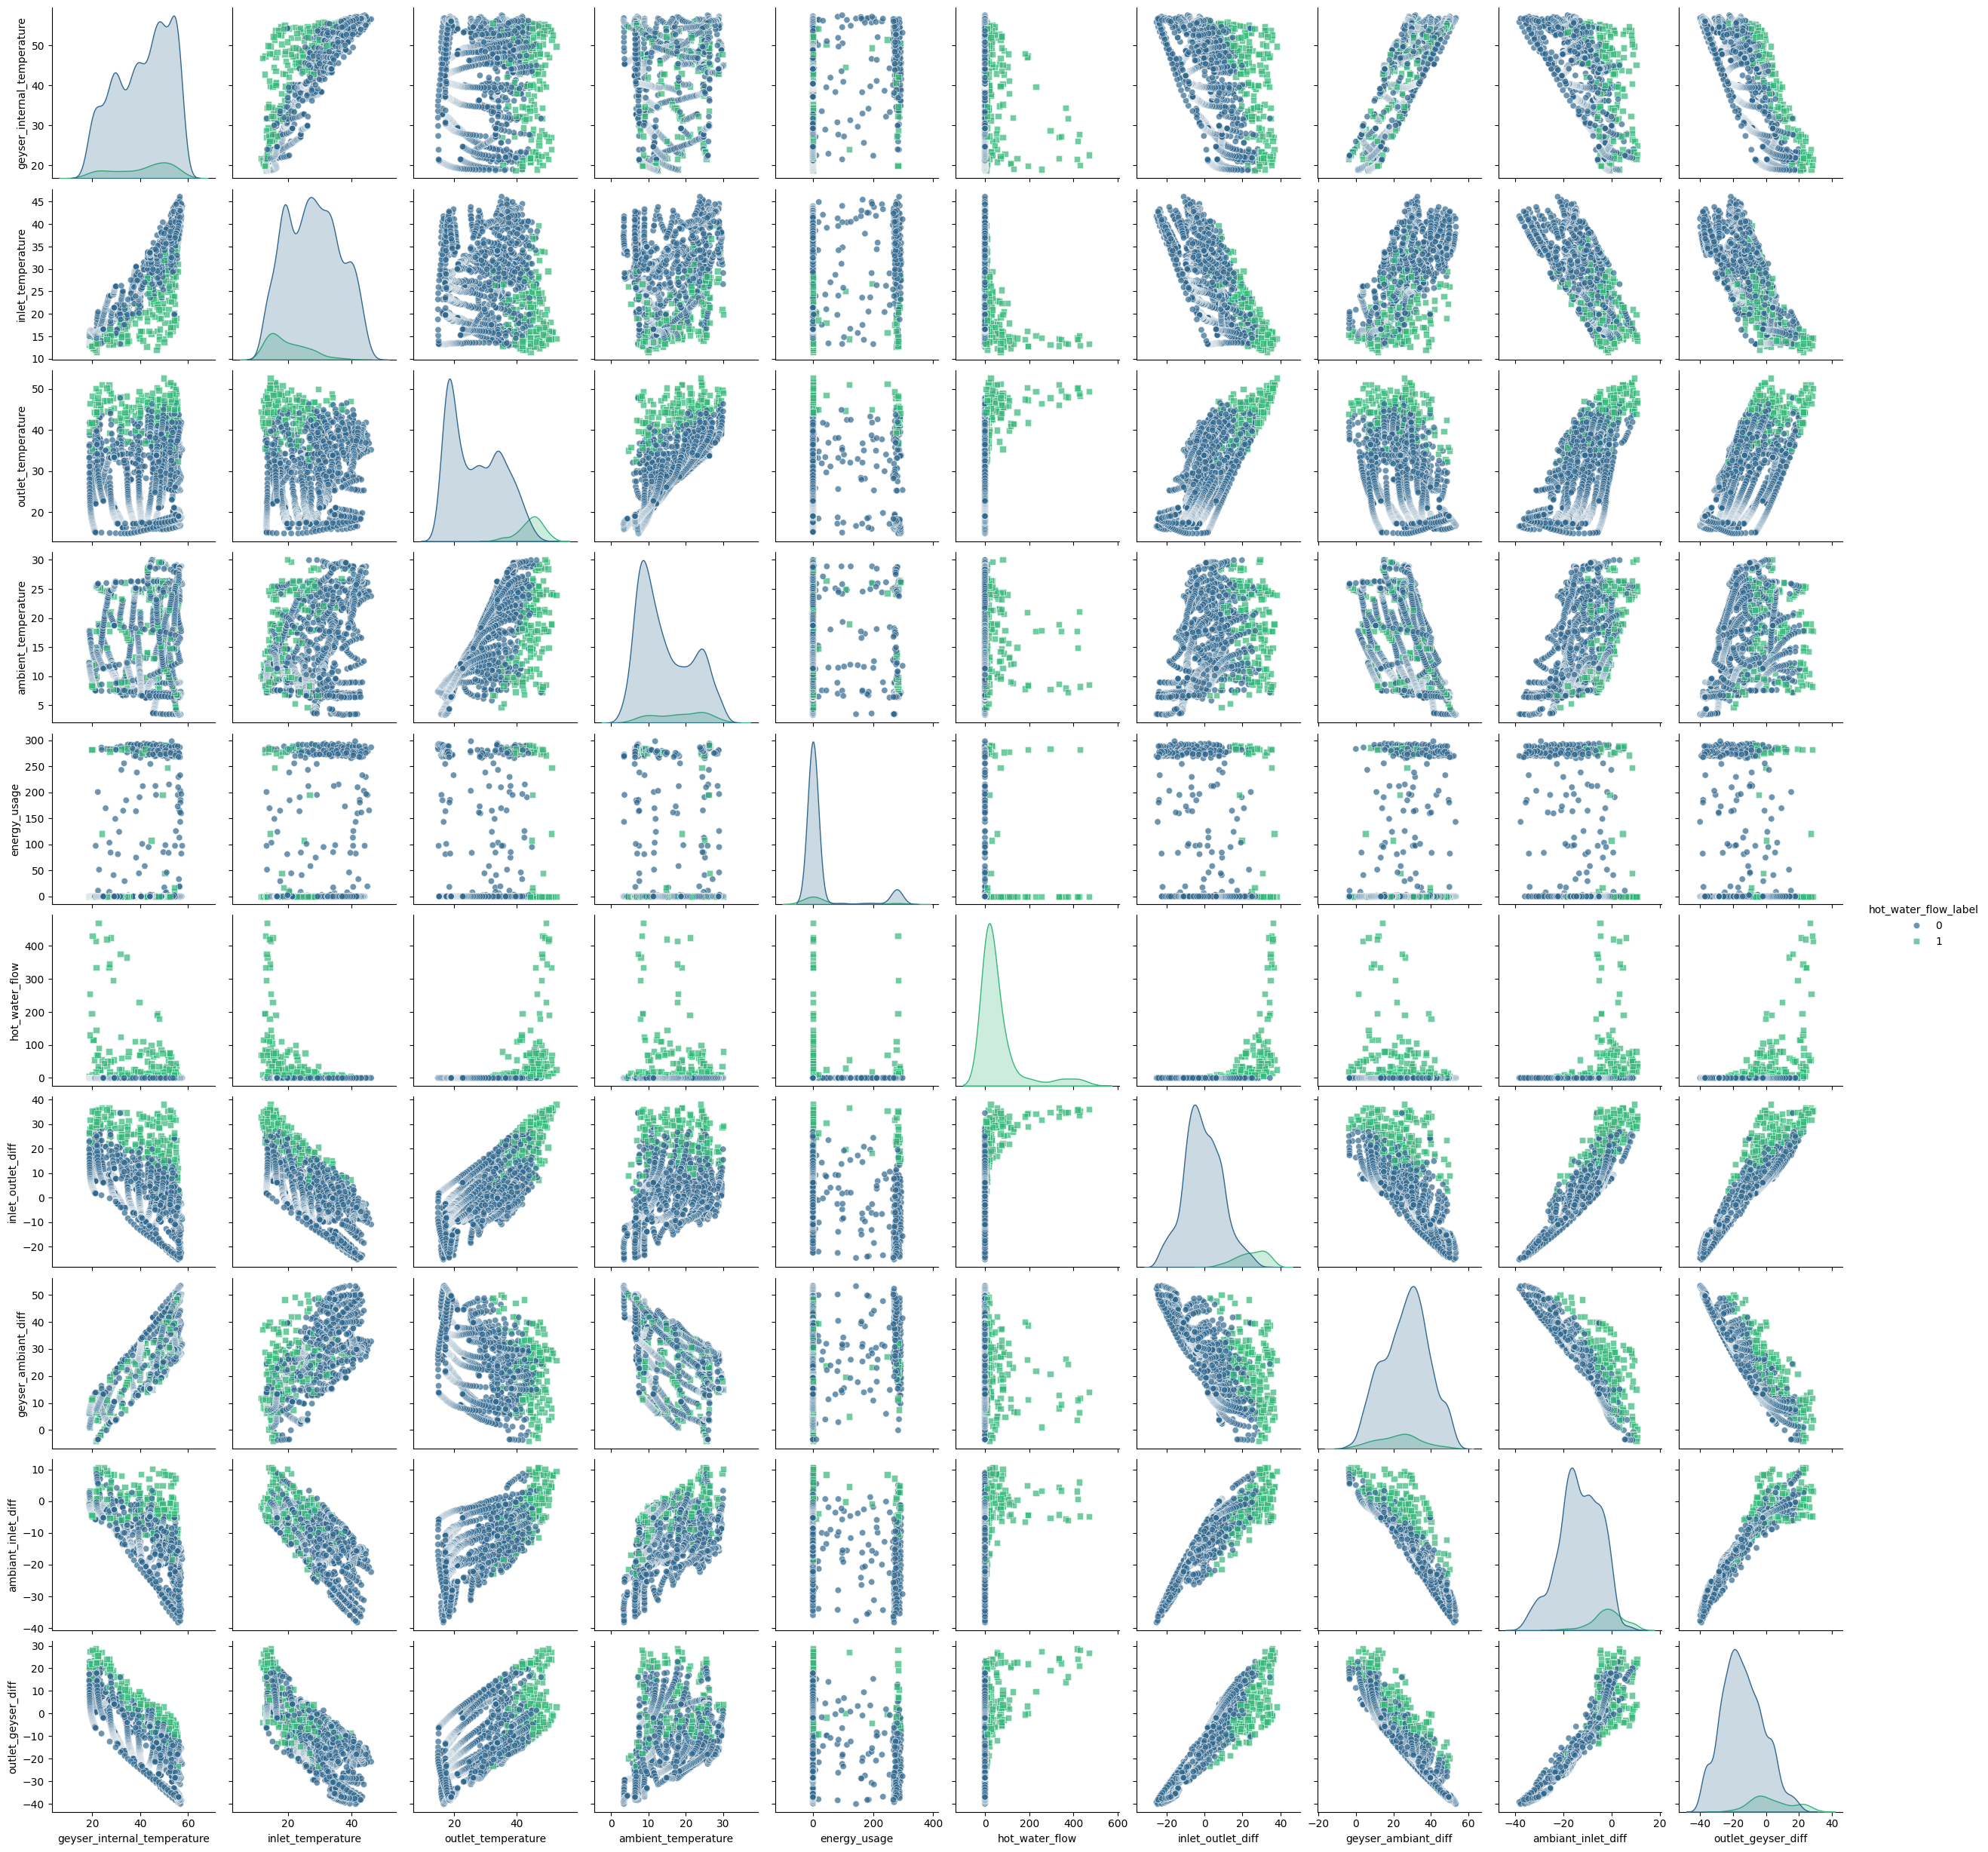

In [ ]:
sns.pairplot(train_data, hue='hot_water_flow_label', diag_kind='kde', markers=['o', 's'],
             plot_kws={'alpha': 0.7}, palette='viridis')
plt.show()

<Axes: xlabel='ambiant_inlet_diff', ylabel='outlet_temperature'>

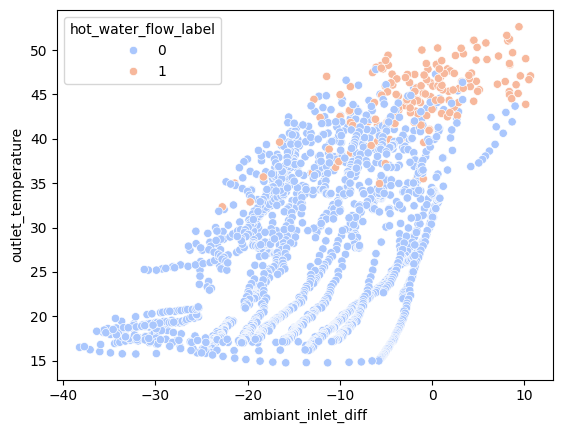

In [ ]:
sns.scatterplot(data=train_data,  x='ambiant_inlet_diff', y='outlet_temperature', hue='hot_water_flow_label', palette='coolwarm')

We can add either one of these, lets add this feature to classify the model as it has overlap but distinguishes clearly then inlet.

<Axes: xlabel='outlet_geyser_diff', ylabel='outlet_temperature'>

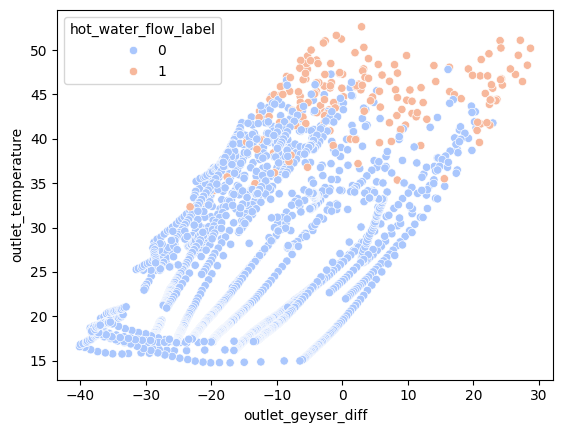

In [ ]:
sns.scatterplot(data=train_data,  x='outlet_geyser_diff', y='outlet_temperature', hue='hot_water_flow_label', palette='coolwarm')

Dropping this as adding the ambient_inlet

## 2.5 Box Plots to decide the range

Just wanted to confirm the median  of the outlet temperature


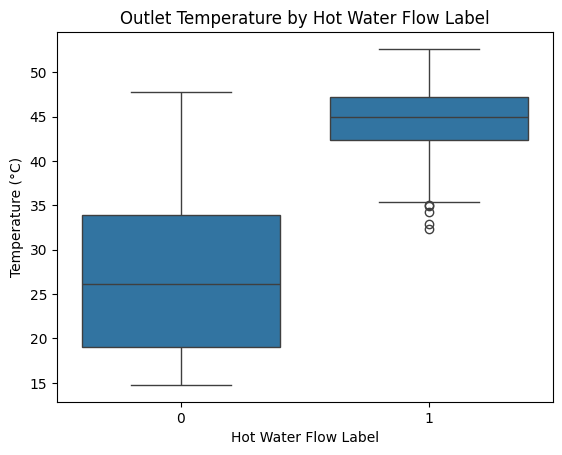

In [ ]:

sns.boxplot(x='hot_water_flow_label', y='outlet_temperature', data=train_data)
plt.title('Outlet Temperature by Hot Water Flow Label')
plt.xlabel('Hot Water Flow Label')
plt.ylabel('Temperature (°C)')
plt.show()


Observtion : There are few outliers in this case , so I can say there is a slight possbility of miss-classification if I use this variable for classification.The median of the inlet_temperature when the hot water label = '1' is between 42 - 53

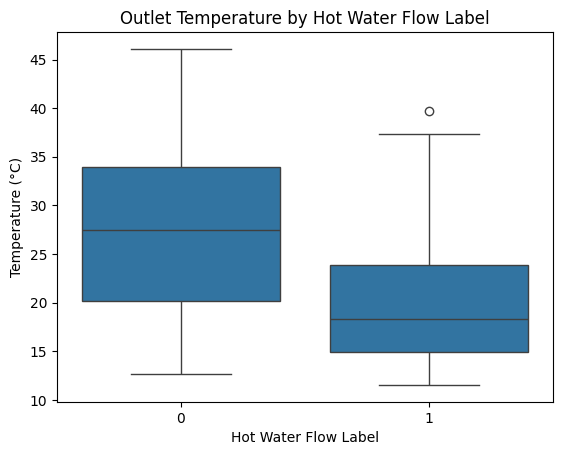

In [ ]:

sns.boxplot(x='hot_water_flow_label', y='inlet_temperature', data=train_data)
plt.title('Outlet Temperature by Hot Water Flow Label')
plt.xlabel('Hot Water Flow Label')
plt.ylabel('Temperature (°C)')
plt.show()

The median of the inlet_temperature when the hot water label = '1' is between 15 - 20





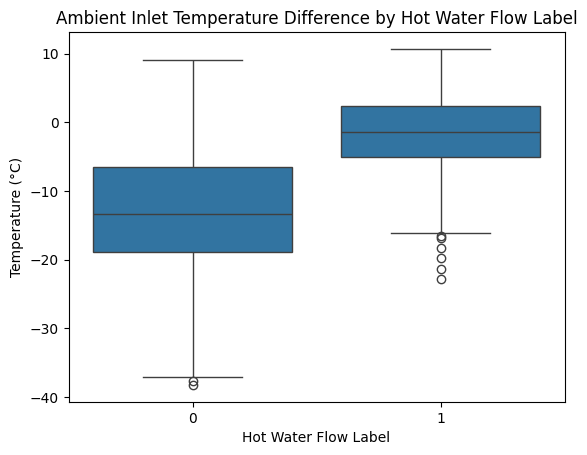

In [ ]:

sns.boxplot(x='hot_water_flow_label', y= 'ambiant_inlet_diff', data=train_data)
plt.title('Ambient Inlet Temperature Difference by Hot Water Flow Label')
plt.xlabel('Hot Water Flow Label')
plt.ylabel('Temperature (°C)')
plt.show()

The quartile range seems to be between -5 to 5

# 3 . Phase I Modeling


## 3.1  Defining Classifier

In [ ]:
class HeuristicClassifier():
    def __init__(self):
        self.best_a = None

    #Training the Model
    def train(self, dataset, a=45):
        data = dataset.copy()
        data['hot_water_draw_prediction'] = np.where(data['outlet_temperature'] > a, 1, 0)

       # 42 - 50 : looking at the histomgram, where there are less chances of missclassification.
        self.best_a, _ = self.best_parameters(data, 42, 55)


        return data



    #Clculating f1_score for finding optimal a , threshold

    def f1_score(self, dataset, a):
        prediction = dataset.copy()
        TP = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 1)])
        FP = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 1)])
        TN = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 0)])
        FN = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 0)])
        precision, recall = TP / (TP + FP), TP / (TP + FN)
        F1 = 2 * (precision * recall) / (precision + recall)
        return F1

    #Finding optimal threshold, (brute force algorithm)
    # $a=45$ look like pretty accurate threshold given the histogram, but let's look for the optimal threshold maximizing the F1-score.
    # One can choose another metric if needed to give different weight to False Negative or False Positives

    def best_parameters(self, dataset, p, q):
        best_a = 45
        best_f1 = self.f1_score(dataset, best_a)
        for a in range(p, q):
            f1_current = self.f1_score(dataset, a)
            if f1_current > best_f1:
                best_a, best_f1 = a, f1_current
        return best_a, best_f1

    #prediction funtion
    def predict_water_draw(self, dataset, a=None):
        if a is None:
            a = self.best_a
        data = dataset.copy()
        data['hot_water_draw_prediction'] = np.where(data['outlet_temperature'] > a, 1, 0)
        return data


In [ ]:
train_percent = 0.8
split_index = int(len(train_data)*train_percent)

train_train_data = train_data.iloc[:split_index]
validation_data = train_data.iloc[split_index:]

In [ ]:
# Step 1: Instantiate the HeuristicClassifier object
classifier = HeuristicClassifier()

# Step 2: Training the classifier on train dataset
trained_data = classifier.train(train_train_data)

# Step 3: Making predictions on train dataset
predictions = classifier.predict_water_draw(train_train_data )

In [ ]:
print(classifier.best_a)

45


In [ ]:
def model_performance(classifier, dataset):
    # Getting the best threshold 'a' from the classifier
    best_a = classifier.best_a


    # Making predictions using the classifier
    prediction = classifier.predict_water_draw(dataset, a=best_a)

    # Calculating TP, FP, TN, FN
    TP = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 1)])
    FP = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 1)])
    TN = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 0)])
    FN = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 0)])

    # Calculating performance metrics
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0  # Handle division by zero
    recall = TP / (TP + FN) if TP + FN != 0 else 0  # Handle division by zero
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0  # Handle division by zero

    # Printing performance metrics
    print(f'Accuracy: {accuracy:.2%}')
    print(f'Precision: {precision:.2%}')
    print(f'Recall: {recall:.2%}')
    print(f'F1-score: {f1_score:.2%}')



In [ ]:
# Metrics Evaluation on the Train data
model_performance(classifier,train_train_data)

Accuracy: 95.58%
Precision: 92.65%
Recall: 48.09%
F1-score: 63.32%


F1 Score seems low, let try to improve the model performance by adding additional features in the classifier


## 3.2 Additional Feature feasibility Analysis to Imporve Model Performance





Let's check the feasibility of using outlet_temprerature feature and ambient_inlet_diff together would make sense

I will keep the threshold of 45°C , as after 45 there is clear difference in the label of hot water 0 and 1 values.



<Axes: ylabel='Frequency'>

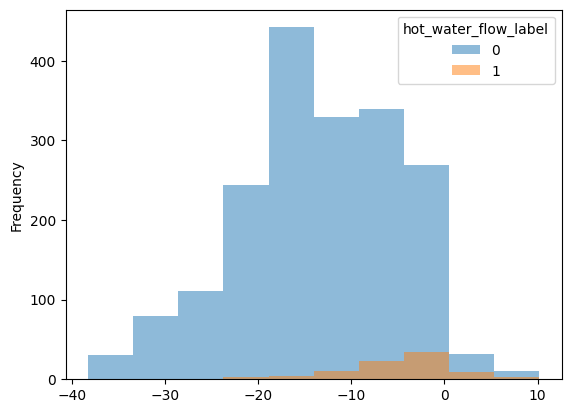

In [ ]:
filter = data.loc[(data['outlet_temperature']<45)]
filter.pivot(columns='hot_water_flow_label', values='ambiant_inlet_diff').plot.hist(alpha=0.5)

I believe there is an overlap between the labels of 0 and 1 in the difference, this would give some new information apart from outlet_temperature. lets explore



In [ ]:
train_data.columns

Index(['device_time', 'geyser_internal_temperature', 'inlet_temperature',
       'outlet_temperature', 'ambient_temperature', 'energy_usage',
       'hot_water_flow', 'hot_water_flow_label', 'inlet_outlet_diff',
       'geyser_ambiant_diff', 'ambiant_inlet_diff', 'outlet_geyser_diff'],
      dtype='object')

## 3.3 Phase II Modeling : Building New Classifier

In [ ]:
class NewHeuristicClassifier():
    def __init__(self):
        self.best_a = None
        self.best_b = None


    #Training the Model
    def train(self, dataset, a=45 , b=0):
        data = dataset.copy()
        data['hot_water_draw_prediction'] = np.where(data['outlet_temperature'] > a, 1, (np.where(data['ambiant_inlet_diff'] > b,1,0) ))

       # 42 - 50(a) , 0 - 20 (b) : looking at the histomgram, where there are less chances of missclassification.
        self.best_a, self.best_b, _ = self.best_parameters(data, 42, 55 , -5, 5)

        return data



    #Clculating f1_score for finding optimal a , threshold

    def f1_score(self, dataset, a , b):
        prediction = self.predict_water_draw(dataset, a ,b )
        TP = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 1)])
        FP = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 1)])
        TN = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 0)])
        FN = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 0)])
        precision, recall = TP / (TP + FP), TP / (TP + FN)
        F1 = 2 * (precision * recall) / (precision + recall)
        return F1

    #Finding optimal threshold, (brute force algorithm)
    # $a=45$ look like pretty accurate threshold given the histogram, but let's look for the optimal threshold maximizing the F1-score.
    # One can choose another metric if needed to give different weight to False Negative or False Positives

    def best_parameters(self, dataset, p, q, c, d):
        best_a = 45
        best_b = 0
        best_f1 = self.f1_score(dataset, best_a , best_b)
        for a in range(p, q):
          for b in range(c, d):
            f1_current = self.f1_score(dataset, a , b )
            if f1_current > best_f1:
                best_a, best_b, best_f1 = a, b, f1_current
        return best_a, best_b, best_f1

    #prediction funtion
    def predict_water_draw(self, dataset, a=None , b=None):
        if a is None:
            a = self.best_a
        if b is None:
            b = self.best_b
        data = dataset.copy()
        data['hot_water_draw_prediction'] = np.where(data['outlet_temperature'] > a, 1, (np.where(data['ambiant_inlet_diff'] > b,1,0) ))
        return data


Finding optimal threshold

$a=45$ and b= 0 look like pretty accurate thresholds given the histograms and box plots, but let's look for the optimal threshold maximizing the F1-score.



In [ ]:
# Step 1: Instantiate the HeuristicClassifier object
classifier = NewHeuristicClassifier()

# Step 2: Training the classifier on train dataset
trained_data = classifier.train(train_train_data)

# Step 3: Making predictions on train dataset
predictions = classifier.predict_water_draw(train_train_data )

In [ ]:
print(classifier.best_a ,classifier.best_b)

42 3


# 4 . Model Evaluation

In [ ]:
def model_performance(classifier, dataset):
    # Geting the best threshold 'a' from the classifier
    best_a = classifier.best_a
    best_b = classifier.best_b

    # Making predictions using the classifier
    prediction = classifier.predict_water_draw(dataset, a=best_a , b= best_b)

    # Calculating TP, FP, TN, FN
    TP = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 1)])
    FP = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 1)])
    TN = len(prediction[(prediction['hot_water_flow_label'] == 0) & (prediction['hot_water_draw_prediction'] == 0)])
    FN = len(prediction[(prediction['hot_water_flow_label'] == 1) & (prediction['hot_water_draw_prediction'] == 0)])

    # Calculating performance metrics
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0  # Handle division by zero
    recall = TP / (TP + FN) if TP + FN != 0 else 0  # Handle division by zero
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0  # Handle division by zero

    # Printing performance metrics
    print(f'Accuracy: {accuracy:.2%}')
    print(f'Precision: {precision:.2%}')
    print(f'Recall: {recall:.2%}')
    print(f'F1-score: {f1_score:.2%}')




In [ ]:
# Metrics Evaluation on the Train data
model_performance(classifier,train_train_data)

Accuracy: 95.22%
Precision: 68.57%
Recall: 73.28%
F1-score: 70.85%


Hurray !!! Seems like we imroved the F1-score by 7 percent.

As the data is imbalanced we use the F1 score

In [ ]:
#Model Evaluation on Validation data set

valid_predict = classifier.predict_water_draw(validation_data)
model_performance(classifier, valid_predict)

Accuracy: 91.55%
Precision: 54.84%
Recall: 82.93%
F1-score: 66.02%


# 5 . Weakness of the Model

Let's dive into the measurements that were misclassified and see if we can identify a pattern

In [ ]:
prediction = valid_predict  #train data predictions
errors = prediction.loc[(prediction.hot_water_flow_label != prediction.hot_water_draw_prediction)]

FP = len(prediction.loc[ (prediction['hot_water_flow_label']==0) & (prediction['hot_water_draw_prediction']==1)])
FN = len(prediction.loc[ (prediction['hot_water_flow_label']==1) & (prediction['hot_water_draw_prediction']==0)])

print(f'{FP} measurements were predicted 1 while the real value was 0')
print(f'{FN} measurements were predicted 0 while the real value was 1')

28 measurements were predicted 1 while the real value was 0
7 measurements were predicted 0 while the real value was 1


Lets filter and check if they have any pattern in the outlet_temperature

In [ ]:
FP_data = prediction.loc[ (prediction['hot_water_flow_label']==0) & (prediction['hot_water_draw_prediction']==1)]
FN_data = prediction.loc[ (prediction['hot_water_flow_label']==1) & (prediction['hot_water_draw_prediction']==0)]

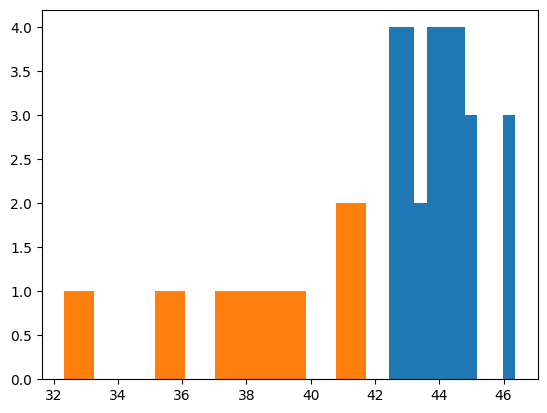

In [ ]:
plt.hist(FP_data.outlet_temperature)
plt.hist(FN_data.outlet_temperature)
plt.show()

The model's performance exhibits notable limitations when analyzing temperature ranges between 32°C and 48°C, as well as in scenarios close to the boundary conditions of this range. These specific temperature intervals appear to challenge the model's predictive accuracy, potentially due to overlapping characteristics of hot water flow within this thermal spectrum or near its edges, leading to increased uncertainty in the model's predictions.

# 6 . Model evaluation on test data set


In [ ]:
test_data = pd.read_csv('/content/DS1.6_training_data.csv')

In [ ]:
test_data['ambiant_inlet_diff'] = test_data['ambient_temperature'] - test_data['inlet_temperature']
test_prediction  = classifier.predict_water_draw(test_data)


test_prediction.to_csv('/content/test_prediction.csv')


# 7 .Lets see what would say a logistic regression and Random forest

I know this is not allowed. It is just to have insights on what features are significant or not

In [ ]:
import statsmodels.api as sm

X, y = train_data[[
    'geyser_internal_temperature', 'inlet_temperature', 'outlet_temperature', 'ambient_temperature', 'energy_usage'
    ]], train_data["hot_water_flow_label"]

logreg = sm.Logit(y, X).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.100572
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     hot_water_flow_label   No. Observations:                 2067
Model:                            Logit   Df Residuals:                     2062
Method:                             MLE   Df Model:                            4
Date:                  Mon, 26 Feb 2024   Pseudo R-squ.:                  0.6490
Time:                          01:27:49   Log-Likelihood:                -207.88
converged:                         True   LL-Null:                       -592.29
Covariance Type:              nonrobust   LLR p-value:                4.359e-165
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
geyser_internal_temperature     0.4114      0.036     11.580      0.000       0.342       0.481
inlet_temperature              -0.9966      0.069    -14.426      0.000      -1.132      -0.861
outlet_temperature              0.0344      0.015      2.335      0.020       0.006       0.063
ambient_temperature             0.2225      0.035      6.351      0.000       0.154       0.291
energy_usage                    0.0002      0.002      0.131      0.896      -0.003       0.004
===============================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
import statsmodels.api as sm

X_f, y_f = train_data[[
    'inlet_temperature', 'outlet_temperature'
    ]], train_data["hot_water_flow_label"]

logreg_f = sm.Logit(y_f, X_f).fit()
logreg_f.summary()

Optimization terminated successfully.
         Current function value: 0.159632
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     hot_water_flow_label   No. Observations:                 2067
Model:                            Logit   Df Residuals:                     2065
Method:                             MLE   Df Model:                            1
Date:                  Mon, 26 Feb 2024   Pseudo R-squ.:                  0.4429
Time:                          01:27:50   Log-Likelihood:                -329.96
converged:                         True   LL-Null:                       -592.29
Covariance Type:              nonrobust   LLR p-value:                4.093e-116
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inlet_temperature     -0.3117      0.017    -18.235      0.000      -0.345      -0.278
outlet_temperature     0.1399      0.009     14.813      0.000       0.121       0.158
======================================================================================
"""

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#train_data['inlet_outlet_diff'] = train_data['outlet_temperature'] - train_data['inlet_temperature']
#train_data['geyser_ambiant_diff'] = train_data['geyser_internal_temperature'] - train_data['ambient_temperature']



train_data.columns

Index(['device_time', 'geyser_internal_temperature', 'inlet_temperature',
       'outlet_temperature', 'ambient_temperature', 'energy_usage',
       'hot_water_flow', 'hot_water_flow_label', 'inlet_outlet_diff',
       'geyser_ambiant_diff', 'ambiant_inlet_diff', 'outlet_geyser_diff'],
      dtype='object')

In [ ]:
X = train_data.drop(['hot_water_flow_label', 'hot_water_flow','device_time'], axis = 1 )
y = train_data['hot_water_flow_label']

X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42,  stratify =y )

In [ ]:
rf_classifier  = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy score :  {round(accuracy,2)}')

Accuracy score :  0.97


In [ ]:
#Finding the feature importance
feature_importance = pd.DataFrame(rf_classifier.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
                             Importance
outlet_temperature             0.390357
inlet_outlet_diff              0.213227
outlet_geyser_diff             0.075020
ambiant_inlet_diff             0.074748
geyser_ambiant_diff            0.064709
geyser_internal_temperature    0.063394
inlet_temperature              0.060972
ambient_temperature            0.049797
energy_usage                   0.007776


In [ ]:
from sklearn.tree import DecisionTreeClassifier

df_classifier  = DecisionTreeClassifier(random_state=42, max_depth=2)
df_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = df_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy score :  {round(accuracy,2)}')

Accuracy score :  0.97


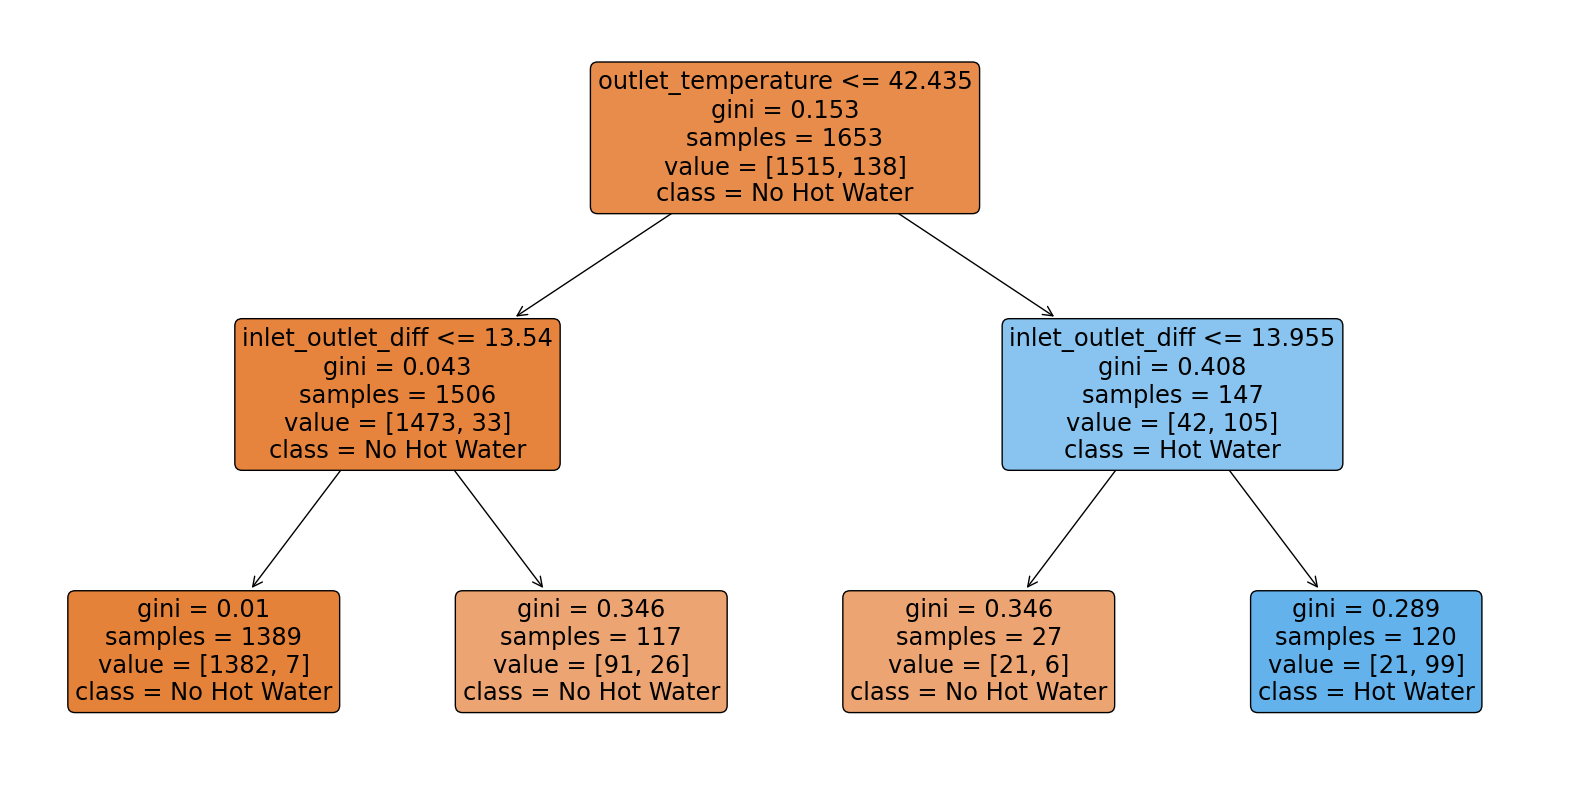

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(df_classifier,  filled=True, feature_names=X.columns, class_names=['No Hot Water', 'Hot Water'], rounded=True)
plt.show()

Conclusion : The New  Heuristic Classifier correctly classifes the Hot Water flow detection  with 70 % F1-Score. The model performs with 66% ccuracy outside the training data as well.


There are few limitations in the model but with time it can be improved. Though the results are different in ML alogorithms, it has not taken care of the multicolinearity.